In [72]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
from scipy import stats
from scipy.optimize import curve_fit

# Monte Carlo exponential and uniform separaterly

In [2]:
# exponential distribution
def M_CDF(mu):
    return 1-np.exp(-mu) # integrate M(mu) from 0 to mu bc mu needs to be positive (polar coords)

def M_inverseCDF(r):
    return -np.log(np.abs(1-r))

# uniform distribution
def Theta_CDF(theta):
    return theta/(2*np.pi)

def Theta_inverseCDF(r):
    return r*2*np.pi

In [85]:
Nsamp = 1e7
trials = range(int(Nsamp))

values_mu = np.zeros(int(Nsamp))
values_theta = np.zeros(int(Nsamp))

# Generate mu and theta separately
for i in trials:
    r1 = r.random() # value between 0 and 1
    r2 = r.randrange(-1000, 1000)/1000 # value between -1 and 1
    
    values_mu[i] = M_inverseCDF(r1) # store randomly generated mu's
    values_theta[i] = Theta_inverseCDF(r2) # store randomly generated theta's

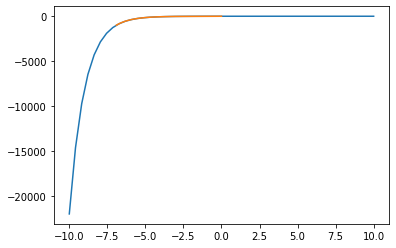

In [86]:
# debugging

test = np.linspace(-10, 10)
plt.plot(test, M_CDF(test))

test_r = np.linspace(-1000, 0)
plt.plot(M_inverseCDF(test_r), test_r)

plt.show()

# Convert back to x and y

In [87]:
# Convert to polar coordinates (mu --> r)

sigma = 1 # arbitrary

values_r = np.sqrt(2*sigma**2 * values_mu)

In [88]:
# Convert to cartesian

x = values_r*np.cos(values_theta)
y = values_r*np.sin(values_theta)

print("mean", np.mean(x))
print("std", np.std(x))

mean -0.0001914836206843054
std 0.9998561709105472


# Plotting

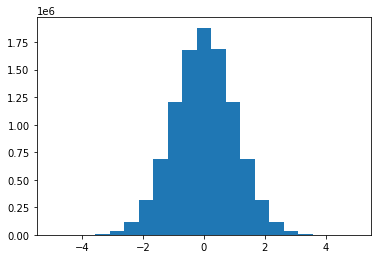

In [89]:
bins = np.linspace(-5, 5, 22)
hist = plt.hist(x, bins)
plt.show()

counts = hist[0]
bin_edges = hist[1]

bin_widths = np.mean(np.diff(bin_edges))
bin_middles = bin_edges+bin_widths/2
bin_middles = bin_middles[:-1]

# normalize
norm = Nsamp*bin_widths
counts /= norm

## Verify quantitatively that your random number generator works.

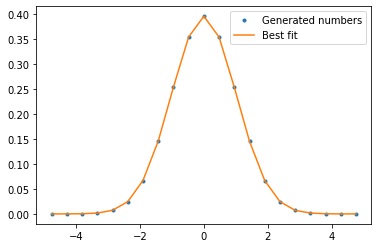

Mean of the best fit curve: -0.00026249211837953097 +/- 0.0002968651578611755


In [91]:
plt.plot(bin_middles, counts, ".", label="Generated numbers")

# Define the Gaussian function
def Gauss(x, A, s, mu):
    y = A*np.exp(-1*s*(x-mu)**2)
    return y

# do a best fit
parameters, covariance = curve_fit(Gauss, bin_middles, counts)

fit_A = parameters[0]
fit_s = parameters[1]
fit_mu = parameters[2]

perr = np.sqrt(np.diag(covariance))

fitted_data = Gauss(bin_middles, fit_A, fit_s, fit_mu)
plt.plot(bin_middles, fitted_data, label="Best fit")
plt.legend()
plt.show()

print("Mean of the best fit curve:", fit_mu, "+/-", perr[2])